In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake_or_real_news.csv')

In [ ]:
X = df['text']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
X_train.shape


(3801,)

In [ ]:
X_test.shape

(2534,)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


In [ ]:
clf = PassiveAggressiveClassifier(max_iter=50)

# Train the model
clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred = clf.predict(tfidf_test)

# Evaluate performance
accuracyPAC = accuracy_score(y_test, y_pred)


In [ ]:
accuracyPAC = metrics.accuracy_score(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracyPAC:.4f}")


Accuracy: 0.9349


Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.4, random_state=42)



In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
predictions = random_forest_model.predict(X_test_tfidf)


In [ ]:
accuracyRF = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracyRF:.4f}')


Accuracy: 0.8934


Logistic

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
logistic_regression_model = LogisticRegression(C=1.0)  # You can experiment with different values for 'C'
logistic_regression_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test_tfidf)


In [ ]:
accuracyLR = metrics.accuracy_score(y_test, y_pred)




In [ ]:
print(f"Accuracy: {accuracyLR:.4f}")


Accuracy: 0.9143


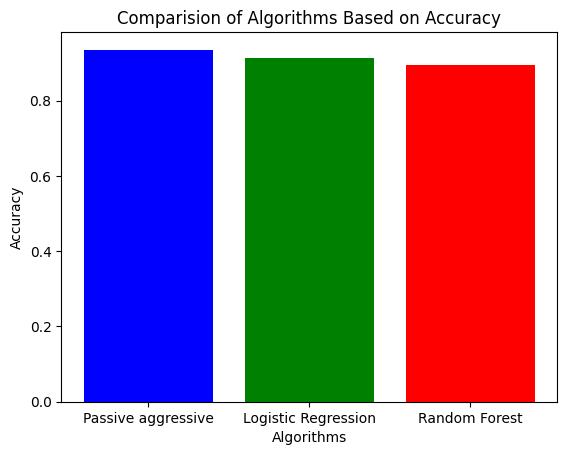

In [ ]:
algorithms=['Passive aggressive','Logistic Regression','Random Forest']
accuracy_scores=[accuracyPAC,accuracyLR,accuracyRF]
plt.bar(list(algorithms),accuracy_scores,color=['blue','green','red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparision of Algorithms Based on Accuracy')
plt.show()